<h1 align="center">ML Lab Report 2</h1>                                         

## Name; Dheeraj Chaudhary
## Roll: 17BCS009

<h2 align="center">Probability Density Function (Pdf) of values in x for normal distribution with mean and fixed deviation </h2>                                         

In [62]:
import numpy as np   
import matplotlib.pyplot as plt 
from mpl_toolkits import mplot3d
from scipy.stats import norm




### Task 1: Pdf for one value in x and mean distributed in 100 parts from 0-10



In [63]:
x = 5
m = np.linspace(0,10,100)
Y_ax = norm.pdf(x, m, 1 )

Text(0, 0.5, 'PDF')

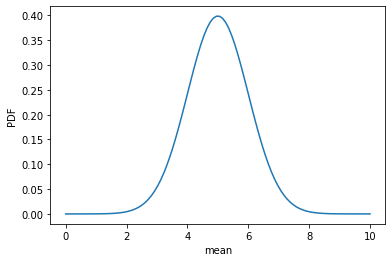

In [64]:
plt.plot(m, Y_ax)
plt.xlabel('mean')
plt.ylabel('PDF')





### Task 2: Pdf for two value of x and rest same condition as above





In [65]:
x = 5
x1 = 7
m = np.linspace(0,10,100)
Y_ax = norm.pdf(x, m, 1 )*norm.pdf(x1, m, 1 )

Text(0, 0.5, 'PDF')

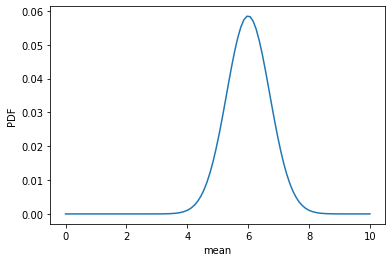

In [66]:

plt.plot(m, Y_ax)
plt.xlabel('mean')
plt.ylabel('PDF')




### Task 3: Pdf for ten value of x and rest same condition as above 
<h3 align="center">Here i'm taking 10 values of x which are randomly generated with mean 5 and deviation 1 </h3>                                          






In [67]:


#x = [1,2,3,4,5,6,7,8,9,10]
#x = [4, 5, 7, 8, 8, 9, 10, 5, 2, 3, 5, 4, 8, 9]
x = np.random.normal(5, 1,10)
m = np.linspace(0,10,100)



<h3 align="center">Task 3.1: Plot of randomly generated value of x with 100 values and mean of 5 along with fixed deviation of 1</h3>                                          


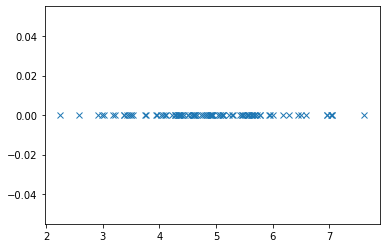

In [68]:
val = 0. # this is the value where you want the data to appear on the y-axis.
x = np.random.normal(5, 1,100) # just as an example array
plt.plot(x, np.zeros_like(x) + val, 'x')
plt.show()

<h3 align="center">Task 3.2: Plot of pdf of randomly generated value of x with 10 values and mean of 5 along with fixed deviation of 1</h3>                                          


In [69]:
ll = 0
for i in x:
    ll += np.log(norm.pdf(i, m, 1))

Text(0, 0.5, 'PDF')

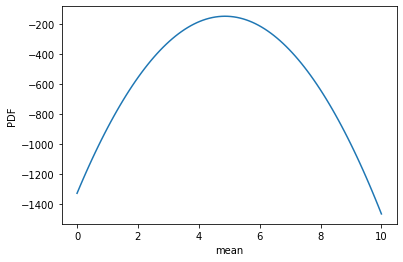

In [70]:
plt.plot(m, ll)
plt.xlabel('mean')
plt.ylabel('PDF')

#### Plotting by directly multiplying them to get the total probability

In [71]:
ll = 1
for i in x:
   
    ll = ll*(norm.pdf(i, m, 1))

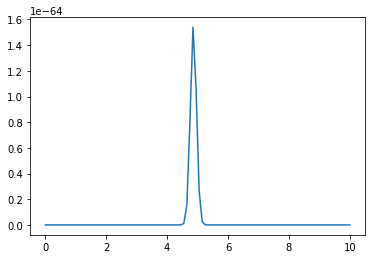

In [72]:
plt.plot(m, ll)

 <h1 align="center">Plotting likelihood function</h1>                                         

## 1: Plotting without intercept

In [88]:
m = 2
x = np.linspace(-5,5,100)
y = m*x
w0 = np.linspace(-5,5,100)
def liklihood(x,u,w0):
    l = 1
    it = len(x)
    for i in range(it):
        l *= norm.pdf(w0*x[i],u[i],1)
    return l

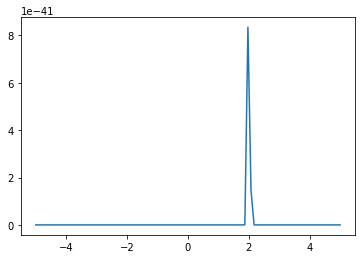

In [89]:
plt.plot(w0,liklihood(x,y,w0))

## Task2: plotting with intercept

In [91]:
# with intercept
y1 = m*x + c
w0 = np.linspace(-10,10,100)
w1 = np.linspace(-10,10,100)
W0 , W1 = np.meshgrid(w0,w1)

In [76]:
def in_liklhood(x,u,W0,W1):                                  #function 1
    l = 1
    it = len(x)
    for i in range(it):
        l *= norm.pdf(W1*x[i]+W0,u[i],1)
    return l
def log_in_liklhood(x,u,W0,W1):                               #function 2
    l = 0
    it = len(x)
    for i in range(it):
        l += np.log(norm.pdf(W1*x[i]+W0,u[i],1))
    return l

## contour with function 1 from above

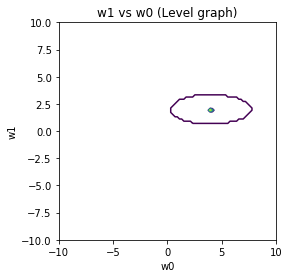

In [92]:
plt.gca().set_aspect('equal',adjustable = 'box')
plt.draw()
plt.xlabel('w0')
plt.ylabel('w1')
plt.title('w1 vs w0 (Level graph)')
plt.contour(W0,W1,in_liklhood(x,y1,W0,W1))                    #considering function 1

## Surface plot while considering 1nd function

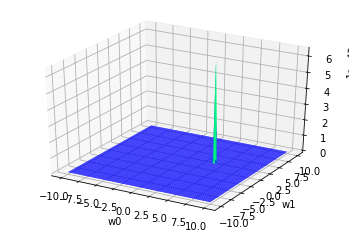

In [93]:
fig = plt.figure()
ax = plt.axes(projection='3d')
plt.xlabel('w0')                                          #considering function 1
plt.ylabel('w1')
ax.plot_surface(W0, W1,in_liklhood(x,y1,W0,W1) , cmap='winter', rstride=1, cstride=1, edgecolor='none')

## contour with function 2 which is defined above

/home/dheeraj/my_projects/my_project_env/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':


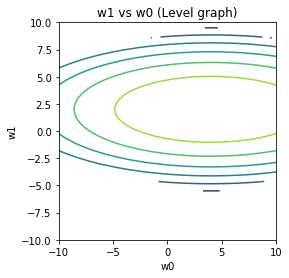

In [79]:
plt.gca().set_aspect('equal',adjustable = 'box')
plt.draw()
plt.xlabel('w0')
plt.ylabel('w1')
plt.title('w1 vs w0 (Level graph)')
plt.contour(W0,W1,log_in_liklhood(x,y1,W0,W1))                  #considering function 2

## Surface plot while considering 2nd function

/home/dheeraj/my_projects/my_project_env/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':


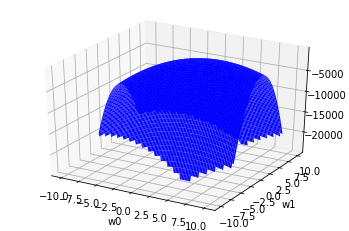

In [80]:
fig = plt.figure()
ax = plt.axes(projection='3d')
plt.xlabel('w0')
plt.ylabel('w1')                                   #considering function 2
ax.plot_surface(W0, W1,log_in_liklhood(x,y1,W0,W1) , cmap='winter', rstride=1, cstride=1, edgecolor='none')

 <h1 align="center">Now plot for error function with the same inputs</h1>                                         

In [81]:
def error(W1,W0,y1):
    l = 0
    it = len(x)
    for i in range(it):
        l += (W1*x[i] + W0 - y1[i])**2
    return l

## Contour curve considering error function

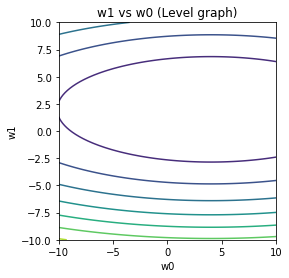

In [82]:
plt.gca().set_aspect('equal',adjustable = 'box')
plt.draw()
plt.xlabel('w0')
plt.ylabel('w1')
plt.title('w1 vs w0 (Level graph)')
plt.contour(W0,W1,error(W1,W0,y1))

## Surface plot of error function

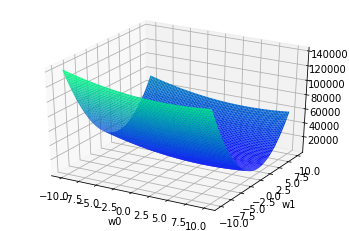

In [95]:
fig = plt.figure()
ax = plt.axes(projection='3d')
plt.xlabel('w0')
plt.ylabel('w1')
ax.plot_surface(W0, W1,error(W1,W0,y1) , cmap='winter', rstride=1, cstride=1, edgecolor='none')

  <h1 align="center">Comparing both likelihood plot (of with 2nd function defined above) with error function</h1>                                         

/home/dheeraj/my_projects/my_project_env/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':


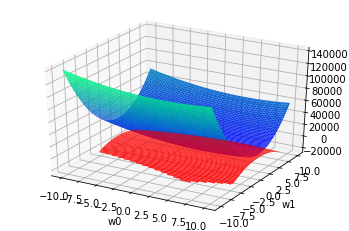

In [97]:
fig = plt.figure()
ax = plt.axes(projection='3d')
plt.xlabel('w0')
plt.ylabel('w1')
ax.plot_surface(W0, W1,error(W1,W0,y1) , cmap='winter', rstride=1, cstride=1, edgecolor='none')
ax.plot_surface(W0, W1,log_in_liklhood(x,y1,W0,W1) , cmap='autumn', rstride=1, cstride=1, edgecolor='none')

# Combined Contour for both error and likelihood function 

/home/dheeraj/my_projects/my_project_env/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':


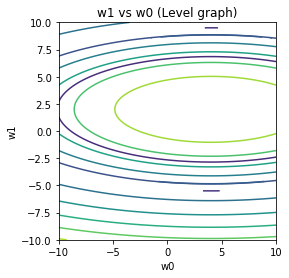

In [87]:
plt.gca().set_aspect('equal',adjustable = 'box')
plt.draw()
plt.xlabel('w0')
plt.ylabel('w1')
plt.title('w1 vs w0 (Level graph)')
plt.contour(W0,W1,error(W1,W0,y1))
plt.contour(W0,W1,log_in_liklhood(x,y1,W0,W1))  